In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [3]:
pop = np.loadtxt('pop_new.csv')

In [80]:
WN = np.loadtxt('W_avg.csv')

In [4]:
R0 = 2.1
r = 0.09
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
f1 = gzip.GzipFile(file_name1, "r")
NewInf =  np.load(f1)

In [35]:
avg_i = np.mean(NewInf,axis=0)

In [63]:
# E_daily_per_pop = avg_i/pop[:,None]*100000 ### all the simulation (500, 3142, 60)
# cate_infe = E_daily_per_pop>10

In [36]:
avg_i[avg_i == 0] = 0.000000000000001
log_avg_i = np.log(avg_i)
variance = (log_avg_i**2)*0.2 + 20
std_new = np.sqrt(variance)
special = np.log(0.000000000000001)
std_new[log_avg_i==special] = 8.881784197001252e-15

In [42]:
NewInf[NewInf==0] = 0.000000000000001

In [45]:
std_simulations = np.std(np.log(NewInf),axis=0)

In [55]:
print (np.min(std_simulations), np.max(std_simulations))

8.881784197001252e-15 17.896728260878305


In [37]:
np.min(log_avg_i)

-34.538776394910684

In [41]:
special = np.log(0.000000000000001)

In [59]:
from matplotlib.colors import ListedColormap


# # Random matrix

# data_ones = np.random.randint(1, 2, size=(8, 8))
# data_both = np.random.randint(0, 2, size=(8, 8))

# # Define colormap

cmapmine = ListedColormap(['b', 'w'], N=2)

# Plot matrix

# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.imshow(data_ones, cmap=cmapmine, vmin=0, vmax=1)
# ax1.set_title('Ones')
# ax2.imshow(data_both, cmap=cmapmine, vmin=0, vmax=1)
# ax2.set_title('Zeros and Ones')
# plt.show()

Text(0, 0.5, 'normalised by sites daily new infections')

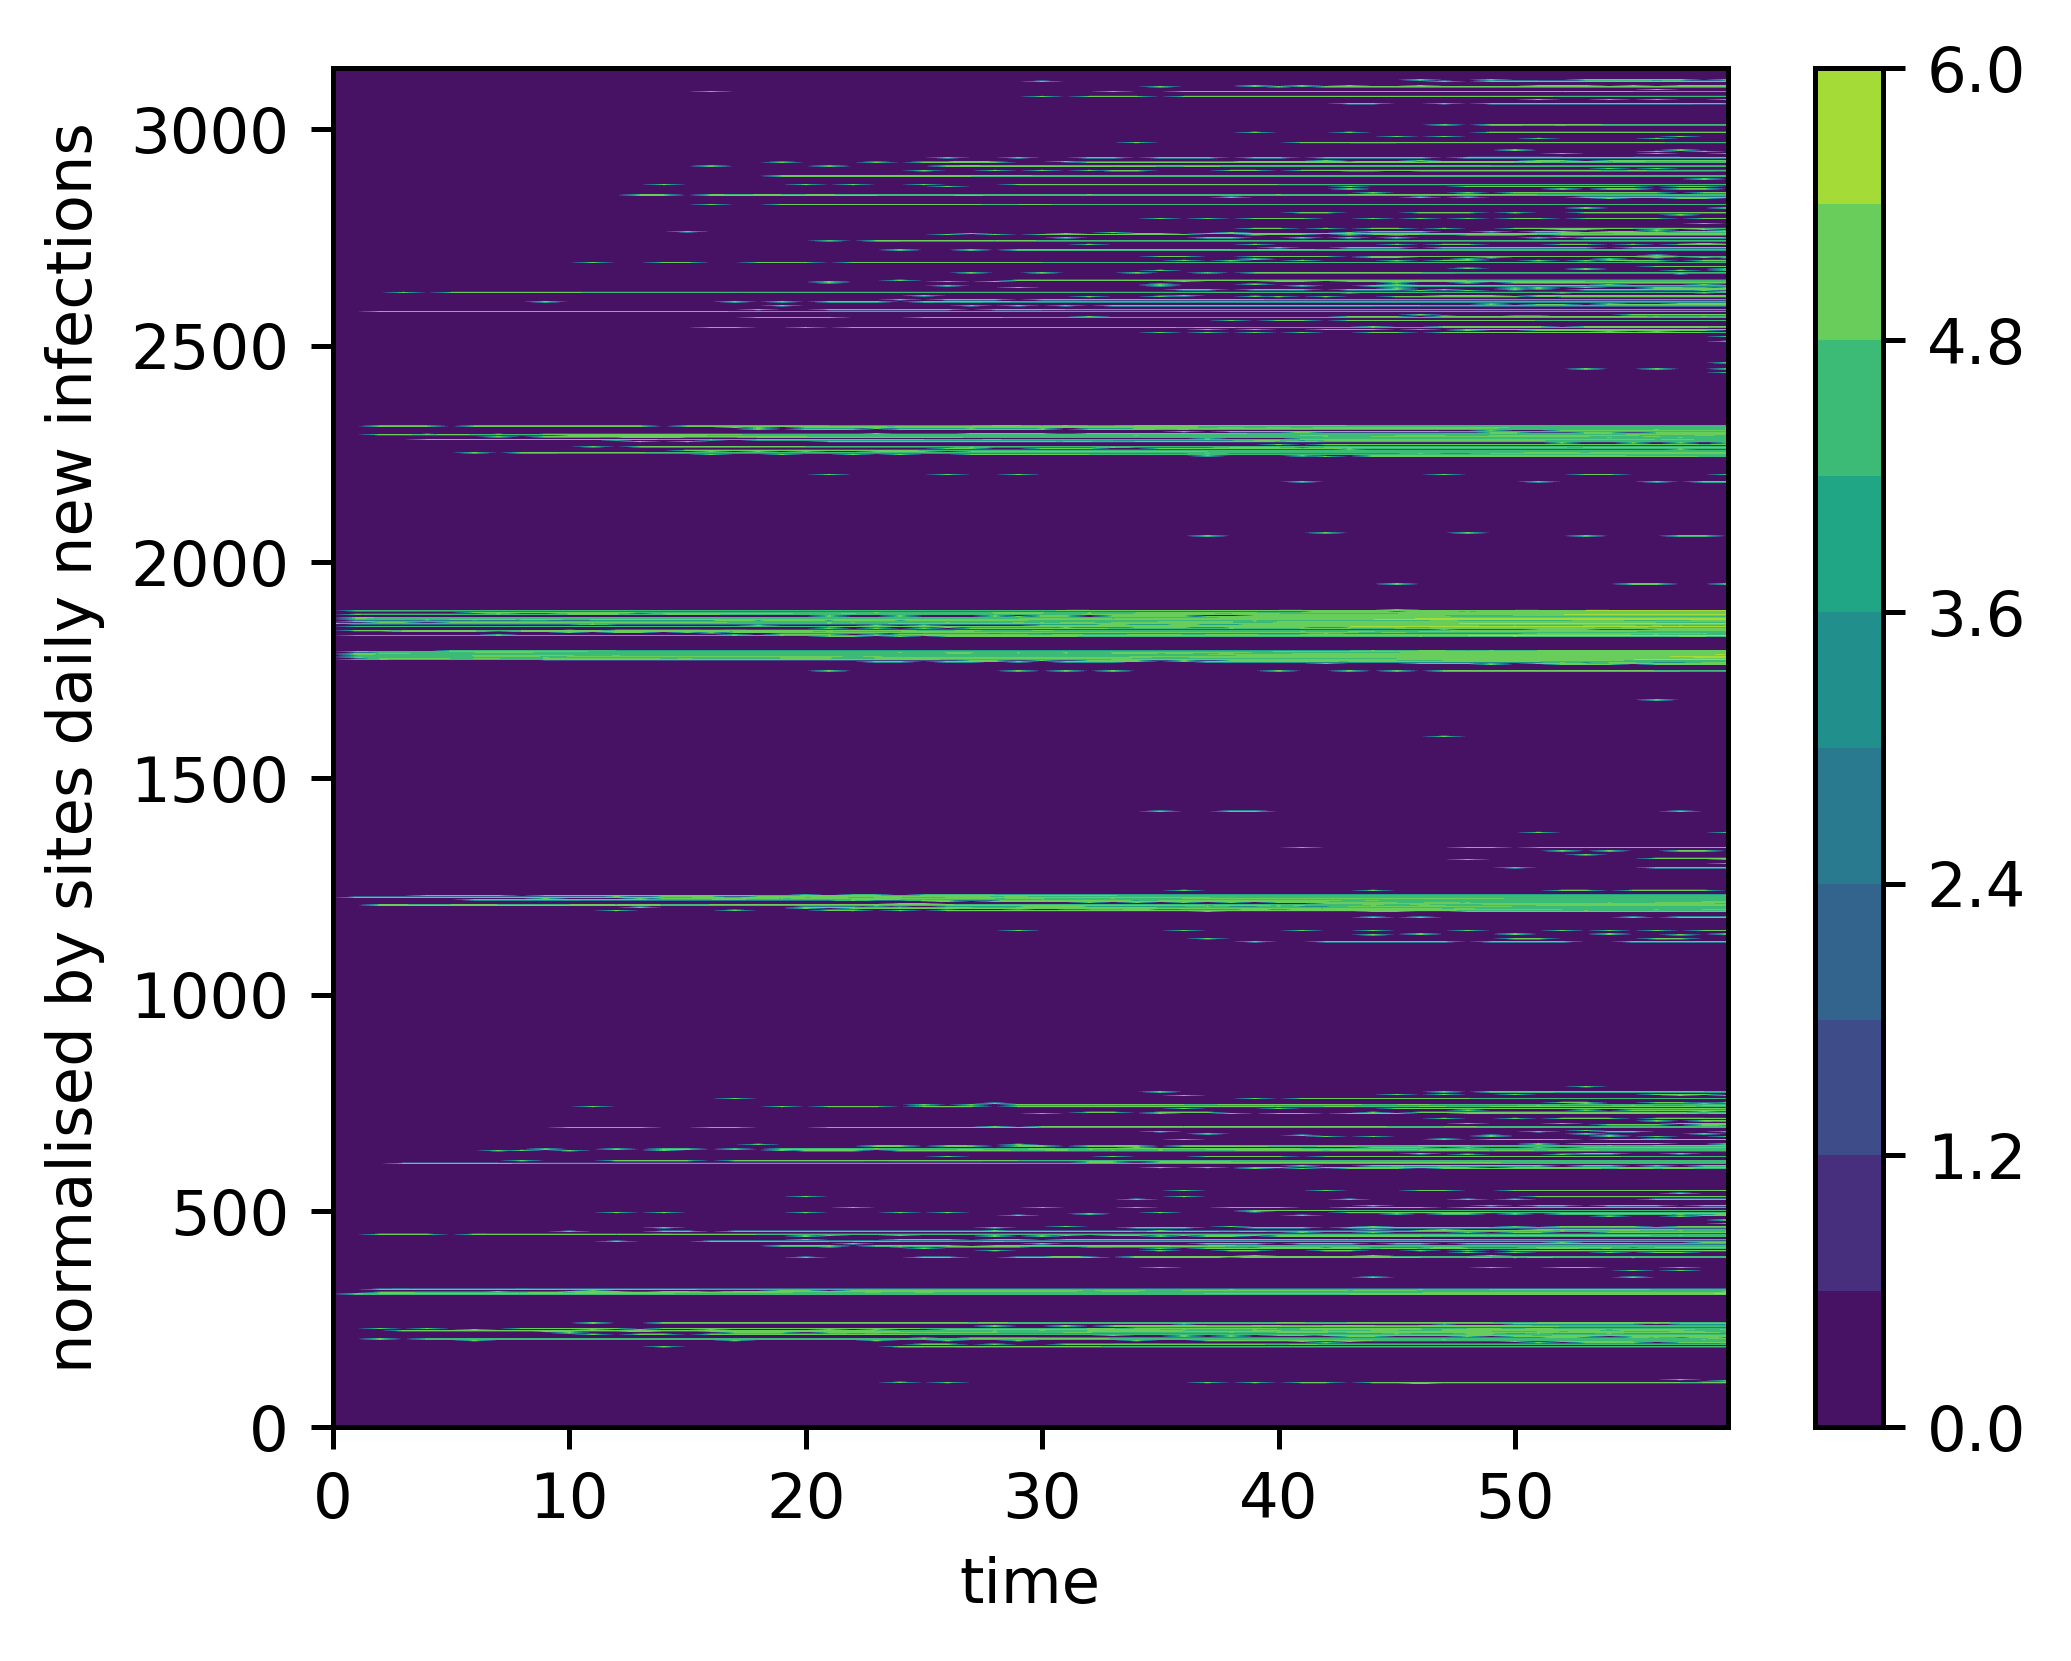

In [76]:
x = np.array(range(60))
y = np.array(range(3142))

X, Y = np.meshgrid(x, y)

# avg_i[avg_i == 0] = 0.00001
# Z = np.log(avg_i)
# Z = avg_std
Z = std_new
# Z = g_i[:,30:]

fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.viridis,vmin=0.0000001, vmax=6.6) #vmax=36
# contour = ax2.contourf(X,Y,Z,cmap=cmapmine, vmin=0, vmax=1)

# contour = ax2.imshow(Z,cmap=plt.cm.coolwarm)

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
plt.xlabel('time')
plt.ylabel('normalised by sites daily new infections')

In [77]:
rs = np.arange(0.01, 1, 0.02)
rs_selected = [0,1,2,3,4,5,6,25,49] ### select some r values
rs = rs[rs_selected]

In [78]:
Inference_mean = np.zeros((9,3142,60))
Inference_std = np.zeros((9,3142,60))
Observation_i = np.zeros((9,3142,60))

In [83]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for r_idx in range(9):
    print(r_idx)
    r_i = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
    f1 = gzip.GzipFile(file_name1, "r")
    NewInf =  np.load(f1)
    
    avg_i = np.mean(NewInf,axis=0)
    avg_i[avg_i == 0] = 0.000000000000001
    log_avg_i = np.log(avg_i)
    variance = (log_avg_i**2)*0.2 + 20
    std_new = np.sqrt(variance)
    special = np.log(0.000000000000001)
    std_new[log_avg_i==special] = 8.881784197001252e-15
    
    Inference_mean[r_idx,:] = log_avg_i
    Inference_std[r_idx,:] = std_new
    temp = NewInf[0,:,:]
    temp[temp==0] = 0.000000000000001
    obser_ts = np.log(temp) ## take the log
    Observation_i[r_idx,:] = obser_ts

0
1
2
3
4
5
6
7
8


In [84]:
# R_loglikelihood_range = np.zeros((9,9)) ### different ranges
for i in range(1):
    observed_ts = Observation_i[i]
    for r_idx in range(1):
        print(r_idx)
        mean_r = Inference_mean[r_idx]
        std_r = Inference_std[r_idx]
    #     std_r_ma = mean_county_r*0.1+1
        M_likelihood = SSA.norm.pdf(observed_ts,loc=mean_r,scale=std_r)
#         for t in range(60):
            
#         R_loglikelihood_range[i,r_idx] = LE(observed_ts,mean_county_r,std_r)

0


In [113]:
np.fill_diagonal(WN, 0)

In [128]:
WN[WN!=0]

array([0.01150176, 0.00793096, 0.02563755, ..., 0.01149425, 0.01027324,
       0.01382528])

(-0.0001, 0.1)

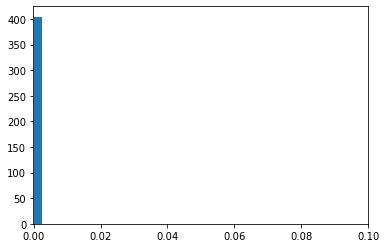

In [130]:
plt.hist(WN.ravel(),density=True,bins=200)
plt.xlim(-0.0001,0.1)

In [117]:
M_likelihood[:,1]

array([4.49169076e+13, 4.49169076e+13, 4.49169076e+13, ...,
       4.49169076e+13, 4.49169076e+13, 4.49169076e+13])

In [ ]:
4.49169076e+13

(-0.1, 1.0)

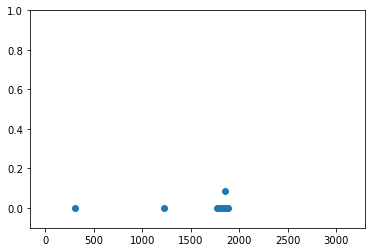

In [96]:
plt.scatter(range(3142),M_likelihood[:,1])
plt.ylim(-0.1,1)

In [91]:
mean_r[1858,0]

4.605170185988092

In [92]:
observed_ts[1858,0]

4.605170185988092

In [93]:
std_r[1858,0]

4.923567658556417